In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
y = pd.DataFrame(housing.target, columns=['target'])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [12]:
X.drop(['Latitude','Longitude'],axis = 1, inplace=True)

In [17]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state= 42)

In [18]:
print(X_train_full.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(16512, 6)
(13209, 6)
(3303, 6)
(4128, 6)


In [20]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
]

c:\Users\Janith\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model = tf.keras.models.Sequential(LAYERS)

In [22]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [25]:
EPOCHS = 20

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4738 - val_loss: 0.8861
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6508 - val_loss: 0.5843
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5298 - val_loss: 0.5664
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4873 - val_loss: 0.4986
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4651 - val_loss: 0.5255
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4582 - val_loss: 0.5273
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4665 - val_loss: 0.5686
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4534 - val_loss: 0.4747
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4359 - val_loss: 0.4764
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4222 - val_loss: 0.4780
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4052 - val_loss: 0.4907
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [26]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.889572,0.886135
1,0.589638,0.584295
2,0.526296,0.566407
3,0.488252,0.498582
4,0.463115,0.525541
5,0.451665,0.527340
6,0.456687,0.568624
7,0.441806,0.474695
8,0.436660,0.476374
9,0.432693,0.478006


<Axes: >

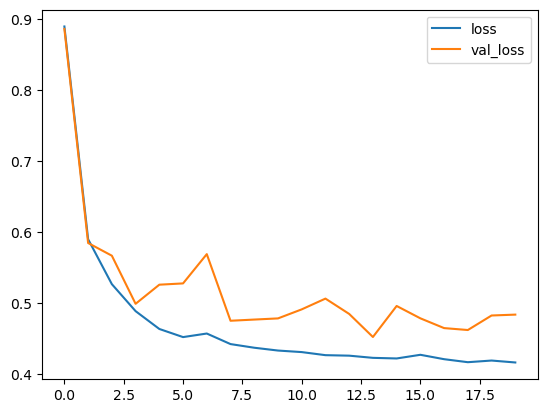

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
model.evaluate(X_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.4339


0.43456369638442993

### Model with callback

In [34]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate = 1e-3)

model_2.compile(loss = LOSS, optimizer = OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights= True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir = "logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_valid, y_valid), callbacks= CALLBACKS)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4132 - val_loss: 0.4428
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3980 - val_loss: 0.4421
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4002 - val_loss: 0.4427
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3976 - val_loss: 0.4426
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3885 - val_loss: 0.4424
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3986 - val_loss: 0.4415
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4074 - val_loss: 0.4422
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4077 - val_loss: 0.4422
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3883 - val_loss: 0.4427
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3887 - val_loss: 0.4423
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4078 - val_loss: 0.4421


In [39]:
!rm -rf logs
%reload_ext tensorboard

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 17808), started 0:00:50 ago. (Use '!kill 17808' to kill it.)

In [45]:
new = X_test[0]
model.predict(new.reshape((1,6)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.011284]], dtype=float32)